## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these. For this project, we will be working to understand the results of an A/B test run by an e-commerce website.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Unique users in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#converted proportion
df['converted'].sum()/float(df.shape[0])

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#times the new_page and treatment don't match.
no_match= len(df[(df['group']=='treatment') & (df['landing_page'] == 'old_page')])+len(df[(df['group']=='control') & (df['landing_page'] == 'new_page')])
print("For {} number of times the new_page and treatment don't match ".format(no_match))

For 3893 number of times the new_page and treatment don't match 


f. Do any of the rows have missing values?

In [7]:
pd.isnull(df).any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

### No rows have missing values in them

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df1=df.copy()

In [9]:
#removing mismatched rows
df_= df.drop(df[(df.group =="treatment") & (df.landing_page != "new_page")].index)
df2= df_.drop(df_[(df_.group =="control") & (df_.landing_page != "old_page")].index)

In [10]:
#checking for rows where the landing_page and group columns don't match
no_match2= len(df2[(df2['group']=='treatment') & (df2['landing_page'] == 'old_page')])+len(df2[(df2['group']=='control') & (df2['landing_page'] == 'new_page')])
print("{} - rows where treatment does not match with new_page or control does not match with old_page  ".format(no_match2))

0 - rows where treatment does not match with new_page or control does not match with old_page  


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
#unique users
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#repeated users
any(df2['user_id'].duplicated())

True

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
#repeated user row information
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#df2.drop_duplicates(subset=['user_id'], inplace=True)
df2.drop(labels = 2893 ,axis=0,inplace=True)

In [17]:
# if the repeated user info got deleted
df2.duplicated().sum()

0

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
#prob of individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))

0.11880806551510564

In [22]:
df2["group"].value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

d. What is the probability that an individual received the new page?

In [23]:
#probability that an individual received the new page
(df2.landing_page == "new_page").mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The provided evidence is not sufficient to say that the new treatment page leads to more conversions.We see that the conversion rate of control group is 12.03% while the conversion rate of traetment grroup is 11.88%.Therefore, the new pages did not increase the conversion rate.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### The null and alternative hypotheses that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5% is
**Null Hypothesis**:  $$H_0: p_{old} - p_{new} \ge
0$$**Alternative Hypothesis**: $$H_1: p_{old} - p_{new} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

 ### H0( Null hypothesis) states there is no difference between the conversion rates of old page and new page.

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
#p_old:conversion rate for the old_page .
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**The conversion rate of $p_{new}$ and $p_{old}$ are equal.**

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
#n_new: number of users landed on the new_page
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
#n_old: number of users landed on the new_page
n_old = len(df2.query('landing_page != "new_page"'))
n_old

145274

**There are 145,310 individuals in the treatment group and 145,274 individuals in the control group**

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17403

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17525

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
#difference btw new and old pages
difference = (new_page_converted/n_new - old_page_converted/n_old)

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
# simulation is run 10000 times.
p_diffs = []

for a in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [32]:
#numpy array
p_diffs = np.array(p_diffs)

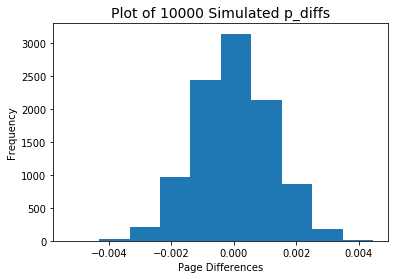

In [33]:
#plotting a histogram
plt.hist(p_diffs);
plt.xlabel('Page Differences')
plt.ylabel('Frequency')
plt.title('Plot of 10000 Simulated p_diffs', fontsize=14);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
df_control = df2.query('group == "control"')
df_treatment = df2.query('group == "treatment"')

In [35]:
#Observed difference
obsd_diff = df_treatment.converted.mean() - df_control.converted.mean()
obsd_diff

-0.0015782389853555567

In [36]:
#Proportion 
P=(p_diffs > obsd_diff).mean()
print("{} proportion of the p_diffs are greater than the actual difference observed.".format(P))

0.9049 proportion of the p_diffs are greater than the actual difference observed.


**k. In words, explain what you just computed in part j. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?**

**For the part j we computed that 90.28% of the p_diffs proportion is greater than the actual difference observed. This value is also called p-value in scientific studies. This value means that we cannot reject the null hypothesis, since the p-value is 0.9028 which is much higher than the alpha 0.05. Also, to show that new_page has a higher conversion rate than the old_page we don't have sufficient evidence.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
n_new = len(df2.query('landing_page == "new_page"'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

In [38]:
convert_new,convert_old

(17264, 17489)

In [39]:
n_new,n_old

(145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
#displaying z_score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
print("{} is the z-score".format(z_score))
print("{} is the p-value".format(p_value))

1.3109241984234394 is the z-score
0.9050583127590245 is the p-value


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [41]:
print("Critical Value: ",norm.ppf(1-(0.05/2)))

Critical Value:  1.959963984540054


**The z-score and the p-value are 1.31092, 0.90505 respectively. The z_score of 1.31, which is less thanthe critical value of 1.959 which means  we fail to reject the null hypothesis(Accept the Null Hypothesis which is the old page).
These values agree with the findings in parts j and k. In part j the p_value obtained is 0.91 and is higher than 0.05 significance level so we dont reject the Null hypothesis that the converted rate of the old_page is the same or greater than the converted rate of the new_page. Thus, we fail to reject the null hypothesis, which is consistent with calculations in parts of j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression- As target variable is categorical and since this is a yes/no type of variable.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
#dummy variable column
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [43]:
df2['intercept'] = 1
df3 = df2.rename(columns={'treatment': 'ab_page'})
df3.head(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
#statsmodels to instantiate regression model
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)
lm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
#summary for the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:01:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**Logit regression shows that the intercept's p-va;ue is less than 0.05, which is significamt for converted rate.**


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p_value related with ab_page is = 0.19. The z_score value is = 0.9. So, the p_value is lower than the z_score because the intercept was added.The null hypothesis associated here is that there is no difference between the treatment and control group. The alternative hypothesis is that there is difference between the treatment and control group.**
**The value differs from the value I found in part II due to the Alternative Hypothesis has only one end (one-tailed in Part II), but here The Alternative Hypothesis has two ends (two-tailed in Part III, they are treatment and intercept which added.)
The results do not support the alternative hypothesis sufficiently in both the cases.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We could consider other factors into the regression model which they might influence the conversions. But there is an abuse that we can't take or calculate all factors which influence the conversions. Adding many factors when we work on regression maybe lead to a useless outcome, especially if the factors have no influences or only have little influence.Another disadvantage is that the model gets more complex and will change every time on the basis of an additional factor.**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [58]:
# Store Countries.csv data in dataframe
df_countries = pd.read_csv('./countries.csv')
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [59]:
#merge the dataframe
df_new = df_countries.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [60]:
# two columns for the three dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [61]:
#the statistical output
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:44:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

#### The regression model too shows that we cannot rejet null hypotehsis. p-values from regression model were not below 5% Type1 error rate. Therefore, we conclude that the influence of landing_page in the US is not different to the influence of landing_page in the other countries and the influence of landing_page in Canada is not different to the influence of landing_page in the other countries.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [62]:
df_new.groupby(['country','ab_page'], as_index=False).mean()

,country,ab_page,converted,intercept,CA,US
0,CA,0,0.118783,1.0,1,0
1,CA,1,0.111902,1.0,1,0
2,UK,0,0.120022,1.0,0,0
3,UK,1,0.121171,1.0,0,0
4,US,0,0.120630,1.0,0,1
5,US,1,0.118466,1.0,0,1


In [70]:
df_new['interaction_CA'] = df_new['CA']*df_new['ab_page']
df_new['interaction_US'] = df_new['US']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US,interaction_CA,interaction_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,0,0


In [73]:
#Fitting of Linear Model
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','US','interaction_US','interaction_CA']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        16:00:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page            0.0108      0.023      0.475      0.635      -0.034       0.056
CA                -0.0118      0.040     -0.296      0.767      -0.090       0.066
US                 0.0057      0.019      0.306      0.760      -0.031       0.043
interaction_US    -0.0314      0.027     -1.181      0.238      -0.084       0.021
interaction_CA    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==================================================================================
"""

In [75]:
#to calculate exponential of all the elements in the input array.
np.exp(results.params)

intercept         0.136392
ab_page           1.010893
CA                0.988285
US                1.005761
interaction_US    0.969090
interaction_CA    0.924703
dtype: float64

In [76]:
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

In [77]:
1/_

group
control      8.305704
treatment    8.409044
Name: converted, dtype: float64

**The p_value for both interaction terms is higher than 0.05. Therefore, we fail to reject null hypothesis.
Thus, the influence of landing_page in the US and Canada is not different to the influence of landing_page in the other countries.**


**No strong evidence that the countries US, CA and UK influence the conversion rate.**
**They are not statistically significant to explain the response variable, or to conclude they have an impact on the conversion rate.**
**Enough evidence is not there to prove that the new_page increases the conversion rate as compared to the old_page.
Variables does not have significant p-values.**



## References
GeekForGeeks
1. https://www.geeksforgeeks.org/numpy-exp-python/ 

SpiPy.org
1. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html 
 
Pandas
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html 

Stack Overflow
1. https://stackoverflow.com/questions/62601140/logistic-model-summary
2. https://stackoverflow.com/questions/53691426/how-to-drop-rows-by-using-query
3. https://stackoverflow.com/questions/16705598/python-2-7-statsmodels-formatting-and-writing-summary-output 
4. https://stackoverflow.blog/2017/10/17/power-calculations-p-values-ab-testing-stack-overflow/

statsmodels.org
1. https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
2. https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html
